## Исследование данных о российском кинопрокате



Заказчик - Министерство культуры Российской Федерации.

Задача - изучить рынок российского кинопроката и выявить текущие тренды. Выявить отношение зрителя к фильмам, которые получили государственную поддержку. 

В распоряжении две таблицы:
1. mkrf_movies — данные о прокатных удостоверениях. 
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.
2. mkrf_shows — данные о прокате в российских кинотеатрах. 
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

Действия:
- Изучить данные.
- Заполнить пропуски.
- Переработать данные.
- Добавить необходимые столбцы.
- Провести исследовательский анализ данных.
- провести исследовательский анализ данных для фильмов с  государственной поддержкой.



### Шаг 1. Загрузка данных. 


Импортируем нужные библиотеки.

In [1]:
import matplotlib.pyplot as df
import pandas as pd
pd.set_option('display.float_format', '{:,.2f}'.format)
import warnings
warnings.filterwarnings("ignore")

Открываем таблицу 'mkrf_movies'.

In [2]:
data_a = pd.read_csv('mkrf_movies.csv')
data_a.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Выводим информацию по таблице 'data_a'

In [3]:
data_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Смотрим количество пропущенных значений в таблице 'data_a'

In [4]:
data_a.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
dtype: int64

Открываем таблицу 'mkrf_shows'

In [5]:
data_s = pd.read_csv('mkrf_shows.csv')
data_s.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


Выводим информацию по таблице 'data_s'

In [6]:
data_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Смотрим количество пропущенных значений в таблице 'data_s'

In [7]:
data_s.isna().sum()

puNumber      0
box_office    0
dtype: int64

Переводим значение в столбца 'puNumber' в таблице 'data_s' в такое как и в столбце 'puNumber' в таблице 'data_a' и объеденяим их.

In [8]:
data_s['puNumber'] = data_s['puNumber'].apply(str)
data = data_a.merge(data_s, on='puNumber', how='outer') 

Проверяем вошли ли все данные из таблицы 'data_a' в твблицу 'data'

In [9]:
puNumber = data_a['puNumber'] == data['puNumber']
puNumber.unique()

array([ True])

Видим что есть только значения 'True' а значит вошли все значения.

### Шаг 2. Предобработка данных

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Приводим текст в нижний регистр для более комфортного иследования.

In [11]:
data['title'] = data['title'].str.lower()

Меняем название столбца.

In [12]:
data = data.rename(columns={'puNumber':'pu_number'})

Меняем формат даты и времени.

In [13]:
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d %H:%M:%S')

Приводим текст в нижний регистр для более комфортного иследования.

In [14]:
data['type'] = data['type'].str.lower()

Приводим текст в нижний регистр для более комфортного иследования.

In [15]:
data['film_studio'] = data['film_studio'].str.lower()

Приводим текст в нижний регистр для более комфортного иследования.

In [16]:
data['production_country'] = data['production_country'].str.lower()

Переводим текст в нижний регистр для более комфортного иследования.

In [17]:
data['director'] = data['director'].str.lower()

Приводим текст в нижний регистр для более комфортного иследования.

In [18]:
data['producer'] = data['producer'].str.lower()

Изменяем проценты на вещественные числа.

In [19]:
data['ratings'] = data['ratings'].str.replace('%', '')

In [20]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,особо опасен,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,особо опасен,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


#### Шаг 2.2. Изучение пропусков в датафрейме

Смотрим общее количество пропущенных значений.

In [21]:
data.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Обратимся к сервису 'КиноПоиск' и посмотрим есть ли там информация по студиям которые принимали участие. Из 18 пропущеных значений можем заменить только 4 что и делаем. Остальные оставляем как есть.

In [22]:
data.loc[data['pu_number'] == '121011114', 'film_studio'] = 'бисцуит пикчерс,деспицабле ентертаинмент,миссион филмс'
data.loc[data['pu_number'] == '214000410', 'film_studio'] = 'концепт спейс'
data.loc[data['pu_number'] == '111013818', 'film_studio'] = 'правда фильмс'
data.loc[data['pu_number'] == '112007018', 'film_studio'] = 'продюсерский центр «молодёжные инициативы»'

Обратимся к сервису 'КиноПоиск' и посмотрим есть ли там информация по странам которые принимали участие. Заменяем все 2 пропущенных значения.

In [23]:
data.loc[data['pu_number'] == '111001216', 'production_country'] = 'ссср,россия'
data.loc[data['pu_number'] == '214000410', 'production_country'] = 'россия'

Обратимся к сервису 'КиноПоиск' и посмотрим есть ли там информация по режссерам которые принимали участие. Из 9 пропущеных значений можем заменить только 2 что и делаем. Остальные оставляем как есть.

In [24]:
data.loc[data['pu_number'] == '214000410', 'director'] = 'василий пичул, юрий владовский'
data.loc[data['pu_number'] == '126002711', 'director'] = 'блу лич'

Сильно много пропущенных значений что-бы узнать что можно поставить в пропусках в столбце 'producer'.

Пропущенные значения могут указывать на то что фильм был без гос.поддержки. 

In [25]:
data['refundable_support'] = data['refundable_support'].fillna(0.0).apply(int)

Пропущенные значения могут указывать на то что фильм был без гос.поддержки. 

In [26]:
data['nonrefundable_support'] = data['nonrefundable_support'].fillna(0.0).apply(int)

Мы не можем знать сумму общего бюджета так-как не всегда она может раскрываться. Заменим 'NaN' на '0' для дальнейшего более удобного исследования.

In [27]:
data['budget'] = data['budget'].fillna(0.0).apply(int)

Пропущенные значения могут указывать на то что фильм был без гос.поддержки.

In [28]:
data['financing_source'] = data['financing_source'].fillna('не имеет гос.финансирования')

Сильно много пропущенных значений что-бы узнать что можно поставить в пропусках в столбце 'genres'.

In [29]:
data['genres'] = data['genres'].fillna('не известно')

Преобразуем данные в столбце 'ratings' и заменим пропущенные значения медианными значениями.

In [30]:
data['ratings'] = data['ratings'].apply(float)
data['ratings'] = data['ratings'].fillna(data['ratings'].median())

In [31]:
data['box_office'] = data['box_office'].fillna(0.0).apply(int)

Сильно много пропущенных значений что-бы узнать что можно поставить в пропусках в столбце 'box_office'.

In [32]:
#Смотрим новое общее количество пропущенных значений.
data.isna().sum()

title                      0
pu_number                  0
show_start_date            0
type                       0
film_studio               14
production_country         0
director                   7
producer                 568
age_restriction            0
refundable_support         0
nonrefundable_support      0
budget                     0
financing_source           0
ratings                    0
genres                     0
box_office                 0
dtype: int64

Пропущенные значения могли образоваться из-за того что люди ввели не все данные или же этих данных просто не было что-бы их ввести. Так-же могли быть ошибки при сохранении, отправке или загрузки данных.

Смотрим количество явных дубликатов.

In [33]:
data.duplicated().sum()

0

В таблице нет явных дубликатов.

In [34]:
#Удаляем неявные дубликаты.
data['title'] = data['title'].drop_duplicates().reset_index(drop=True)
data.head(50)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,0,0,0,не имеет гос.финансирования,7.20,"боевик,драма,мелодрама",0
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,0,0,0,не имеет гос.финансирования,6.60,"драма,военный",0
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0,0,0,не имеет гос.финансирования,6.80,"фантастика,боевик,триллер",0
3,остановился поезд,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0,0,0,не имеет гос.финансирования,6.80,"фантастика,боевик,триллер",0
4,любовь и голуби,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0,0,0,не имеет гос.финансирования,6.80,"фантастика,боевик,триллер",0
5,любовь и сигареты,111013816,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,в.абдрашитов,NaN,«6+» - для детей старше 6 лет,0,0,0,не имеет гос.финансирования,7.70,драма,0
6,отпетые мошенники.,111007013,2013-10-18 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,в.меньшов,NaN,«12+» - для детей старше 12 лет,0,0,0,не имеет гос.финансирования,8.30,"мелодрама,комедия",2700
7,отпуск за свой счет,221074614,2014-12-29 12:00:00+00:00,художественный,"юнайтед артистс, грин стрит филмз, айкон интер...",сша,джон туртурро,"джон пенотти, джон туртурро",«18+» - запрещено для детей,0,0,0,не имеет гос.финансирования,6.60,"мюзикл,мелодрама,комедия",0
8,превосходство борна /по одноименной новелле ро...,121011416,2016-05-05 12:00:00+00:00,художественный,"пульсар продюксьон, тф1 фильм",франция,эрик беснард,патрис леду,«18+» - запрещено для детей,0,0,0,не имеет гос.финансирования,8.00,"комедия,криминал",0
9,ответный ход,111019114,2014-12-01 12:00:00+00:00,художественный,"киностудия ""мосфильм"", телевидение внр","ссср, венгрия",в.титов,NaN,«12+» - для детей старше 12 лет,0,0,0,не имеет гос.финансирования,7.80,"мелодрама,комедия",0


#### Шаг 2.4. Изучение категориальных значений

Общей проблемой были разные регистры но они были исправлены ранее. А так-же большое количество уникальных значений.

In [35]:
#Исправляем столбец "type".
data['type'] = data['type'].str.strip()

#### Шаг 2.5. Проверька количественных значений

In [36]:
data.describe()

,refundable_support,nonrefundable_support,budget,ratings,box_office
count,"7,486.00","7,486.00","7,486.00","7,486.00","7,486.00"
mean,"526,182.21","2,172,280.03","5,642,568.25",6.80,"32,262,853.57"
std,"5,781,108.09","16,148,935.45","47,528,177.69",5.12,"160,600,784.11"
min,0.00,0.00,0.00,1.00,0.00
25%,0.00,0.00,0.00,6.00,0.00
50%,0.00,0.00,0.00,6.60,0.00
75%,0.00,0.00,0.00,7.20,"1,080,467.75"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00",99.00,"3,073,568,690.00"


Смотрим есть ли сумма общей поддержки которая больше общего бюджета

In [37]:
refundable = data['refundable_support'] + data['nonrefundable_support']
refundable_1 = data['budget'] < refundable
refundable_1[refundable_1 == True]

2053    True
2058    True
2472    True
2532    True
2615    True
2684    True
2788    True
2874    True
3047    True
3565    True
3675    True
3739    True
5673    True
5806    True
6008    True
6323    True
6823    True
dtype: bool

Такие суммы есть.
Они могут быть вызваны аномальными данными в в стобцах с данными поддержки.

In [38]:
data['refundable_support'].sort_values(ascending = False).head(10)

7114    180000000
3351    150000000
6472    115000000
3164    110000000
5437    110000000
7474    100000000
7464    100000000
3453    100000000
7466    100000000
5569    100000000
Name: refundable_support, dtype: int64

Аномальных значений нет

In [39]:
data['nonrefundable_support'].sort_values(ascending = False).head(10)

7474    400000000
5653    400000000
7464    400000000
2920    392104482
6887    300000000
3351    300000000
5826    260000000
3565    250000000
5569    250000000
2699    250000000
Name: nonrefundable_support, dtype: int64

Аномальных значений тоже нет.

In [40]:
refundable_2 = data[data['budget'] < refundable]
refundable_2

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,судная ночь 2,111023614,2014-12-19 12:00:00+00:00,художественный,"ооо киностудия ""сентябрь""",россия,а.зайцев,"о.гранина, а.зайцев",«16+» - для детей старше 16 лет,0,23000000,0,"Министерство культуры, Фонд кино",6.60,мелодрама,10234016
2058,проклятие аннабель,111000415,2015-01-26 12:00:00+00:00,художественный,"ооо ""киностудия ""слово"", ооо ""арт пикчерс студия""",россия,р.прыгунов,"п.ануров, ф.бондарчук, д.рудовский",«16+» - для детей старше 16 лет,0,75000000,0,Фонд кино,6.60,драма,446163511
2472,рыба моя,111017315,2015-09-28 12:00:00+00:00,художественный,"ооо ""форпост продакшн"", ооо ""арт пикчерс студия""",россия,а.андрианов,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,10000000,70000000,0,Фонд кино,7.80,"боевик,драма,криминал",196572438
2532,терминатор (1984),111009615,2015-05-26 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.штурманова,т.вайнштейн,«16+» - для детей старше 16 лет,20000000,0,0,Фонд кино,6.20,"комедия,фэнтези",67418974
2615,клан (2015),114001715,2015-07-21 12:00:00+00:00,анимационный,"ооо ""глюкоза продакшн"", ооо ""арт пикчерс студия""",россия,м.фадеев,а.чистяков,«6+» - для детей старше 6 лет,60000000,100000000,0,Фонд кино,4.60,"мультфильм,приключения,фэнтези",184487551
2684,короткометражные анимационные фильмы. оскар 2016,111010215,2015-06-08 12:00:00+00:00,художественный,"ооо ""кинокомпания ""коктебель""",россия,м.местецкий,"р.борисевич, а.кушаев",«18+» - запрещено для детей,0,59000000,0,Фонд кино,6.30,"комедия,драма",1957738
2788,опасные каникулы,111017115,2015-09-30 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,с чекалов,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,0,35000000,0,Фонд кино,5.10,"комедия,мелодрама",72937783
2874,я-учитель,111004916,2016-03-01 12:00:00+00:00,художественный,"ооо ""кинофирма""",россия,в.ровенский,"ооо ""кинофирма""",«12+» - для детей старше 12 лет,0,6000000,0,Министерство культуры,4.30,комедия,15362931
3047,одарённая,111008216,2016-04-29 12:00:00+00:00,художественный,"ао ""вайт медиа"", ооо ""арт пикчерс студия""",россия,д.тюрин,"ф.бондарчук, т.вайнштейн, д.рудовский",«16+» - для детей старше 16 лет,19000000,51000000,0,Фонд кино,6.30,"комедия,мелодрама",70299052
3565,"там, где живут чудовища",111018116,2016-12-16 12:00:00+00:00,художественный,"ооо ""водород 2011"", ооо ""арт пикчерс студия""",россия,ф.бондарчук,"ооо ""арт пикчерс студия""",«12+» - для детей старше 12 лет,0,250000000,0,Фонд кино,5.60,фантастика,1038321489


Тут мы видим что бюджет просто не прописан. Можно сделать вывод что сумма бюджета равняется сумме средсв из поддержки.

In [41]:
data['budget'] = data['budget'].mask(data['budget'] == 0)

In [42]:
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,0,0,NaN,не имеет гос.финансирования,7.20,"боевик,драма,мелодрама",0
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,0,0,NaN,не имеет гос.финансирования,6.60,"драма,военный",0
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0,0,NaN,не имеет гос.финансирования,6.80,"фантастика,боевик,триллер",0
3,остановился поезд,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0,0,NaN,не имеет гос.финансирования,6.80,"фантастика,боевик,триллер",0
4,любовь и голуби,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0,0,NaN,не имеет гос.финансирования,6.80,"фантастика,боевик,триллер",0


Ставим вместо '0' пропуски.

In [43]:
data['budget'] = data['budget'].fillna(refundable)
data[data['budget'] > 0].head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1281,час призраков,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0,26500000,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама",365353
1448,стартап.,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0,26000000,"37,142,857.00",Министерство культуры,6.60,не известно,28140
1498,плюс один.,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0,107847945,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика",19957031
1524,dream theatre. live at luna park,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0,28000000,"40,574,140.00",Министерство культуры,4.20,драма,55917
1792,тупой и еще тупее 2,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0,25000000,"40,015,122.00",Министерство культуры,6.40,драма,232100


Заменяем значения 'nan' на сумму сложения 'refundable_support' и 'nonrefundable_support'

In [44]:
ref = data['budget'] < refundable
ref.unique()

array([False])

Теперь все нормально.

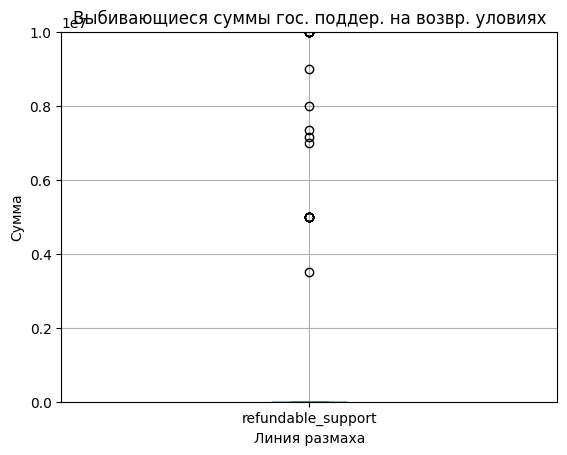

In [45]:
data.boxplot('refundable_support') 
df.ylim(-100, 10000000)
df.title("Выбивающиеся суммы гос. поддер. на возвр. уловиях")
df.xlabel("Линия размаха")
df.ylabel("Сумма")
df.show()

Первые выбросы начинаются с 3.8 миллионов.

count         7,486.00
mean        526,182.21
std       5,781,108.09
min               0.00
25%               0.00
50%               0.00
75%               0.00
max     180,000,000.00
Name: refundable_support, dtype: float64

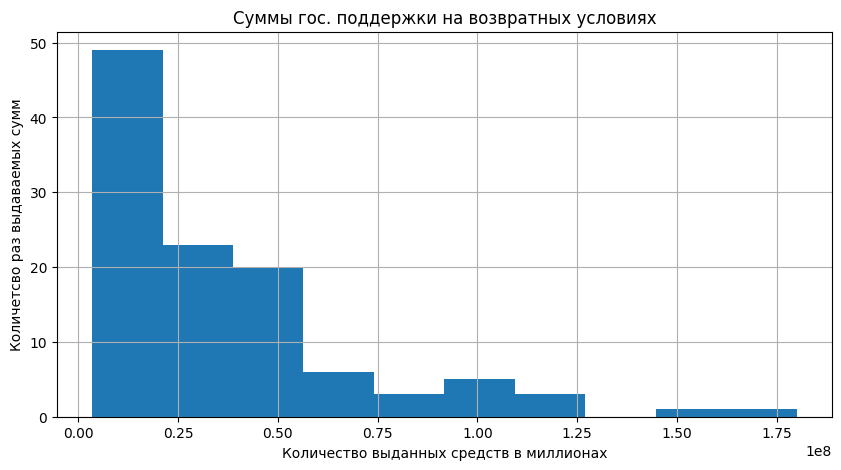

In [46]:
data['refundable_support'][data['refundable_support'] > 0].hist(figsize = (10,5))
df.title("Суммы гос. поддержки на возвратных условиях")
df.xlabel("Количество выданных средств в миллионах")
df.ylabel("Количетсво раз выдаваемых сумм")
data['refundable_support'].describe()

Среднее значение возвратных средств стоставляет - 526 миллионов.
медианное значение  возвратных средств составляет - 578 миллионов.
Больше всего возратных средств выделяют на сумму 40 - 200 миллионов.

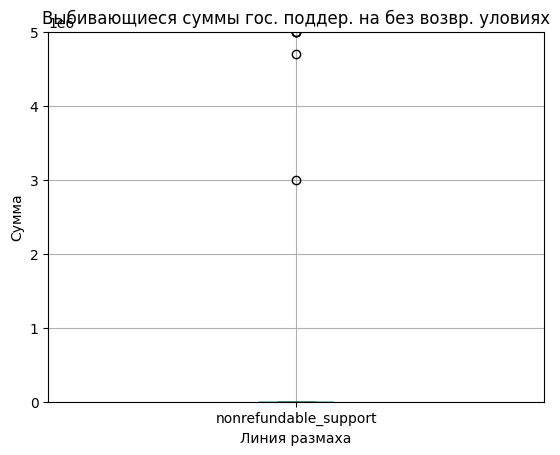

In [47]:
data.boxplot('nonrefundable_support') 
df.ylim(-100, 5000000)
df.title("Выбивающиеся суммы гос. поддер. на без возвр. уловиях")
df.xlabel("Линия размаха")
df.ylabel("Сумма")
df.show()

Первые выбросы появляются с 3 миллионов.

count         7,486.00
mean      2,172,280.03
std      16,148,935.45
min               0.00
25%               0.00
50%               0.00
75%               0.00
max     400,000,000.00
Name: nonrefundable_support, dtype: float64

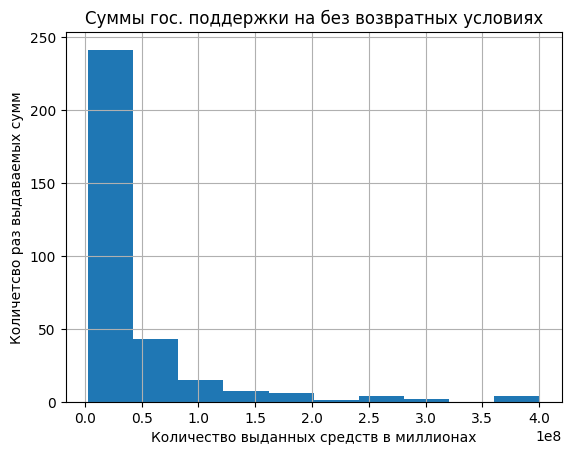

In [48]:
data['nonrefundable_support'][data['nonrefundable_support'] > 0].hist()
df.title("Суммы гос. поддержки на без возвратных условиях")
df.xlabel("Количество выданных средств в миллионах")
df.ylabel("Количетсво раз выдаваемых сумм")
data['nonrefundable_support'].describe()

Среднее значение невозвратных средств стоставляет - 217 миллионов.
медианное значение  невозвратных средств составляет - 160 миллионов.
Больше всего возратных средств выделяют на сумму 100 - 400 тысяч.

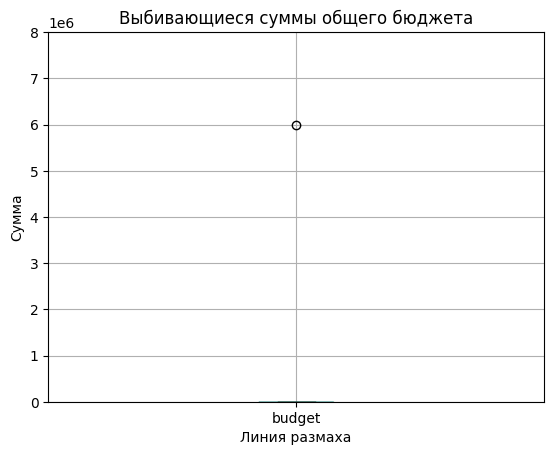

In [49]:
data.boxplot('budget') 
df.ylim(-100, 8000000)
df.title("Выбивающиеся суммы общего бюджета")
df.xlabel("Линия размаха")
df.ylabel("Сумма")
df.show()

Первые выбросы начинаются с 6 миллионов.

count           7,486.00
mean        5,828,511.27
std        47,759,472.74
min                 0.00
25%                 0.00
50%                 0.00
75%                 0.00
max     2,305,074,303.00
Name: budget, dtype: float64

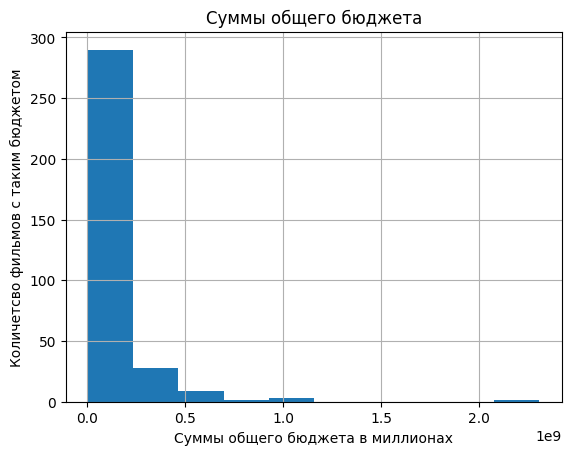

In [50]:
data['budget'][data['budget'] > 0].apply(int).hist()
df.title("Суммы общего бюджета")
df.xlabel("Суммы общего бюджета в миллионах")
df.ylabel("Количетсво фильмов с таким бюджетом")
data['budget'].describe()

Среднее значение бюджета составляет 490 миллионов.
медианное 340 миллионов.
самое большое количество общего бюджета находиться в районе от 100 тысяч до 900 тысяч. Можно сказать что студии получившие гос. поддержку на без возратной основе не сильно добавляют своих средст в бюджет фильма.

Причины появления выбросов могли появиться из-за разных бюджетов. На появление более высоких бюджетов могло повлиять множество факторов, начиная с инфляции и заканчивая маштабом проекта.

#### Шаг 2.6. Новые столбцы





In [51]:
#Создаем столбец с годом проката.
data['year_release'] = pd.DatetimeIndex(data['show_start_date']).year

Создаем 2 столбца с именем и фамилией главного режессёра и основным жанром фильма.

In [52]:
data['main_director'] = data['director'].str.split(',')
data['main_director'] = data['main_director'].str[0]
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release,main_director
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,0,0,0.00,не имеет гос.финансирования,7.20,"боевик,драма,мелодрама",0,2015,кевин костнер
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,0,0,0.00,не имеет гос.финансирования,6.60,"драма,военный",0,2016,е.матвеев
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0,0,0.00,не имеет гос.финансирования,6.80,"фантастика,боевик,триллер",0,2016,тимур бекмамбетов
3,остановился поезд,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0,0,0.00,не имеет гос.финансирования,6.80,"фантастика,боевик,триллер",0,2016,тимур бекмамбетов
4,любовь и голуби,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0,0,0.00,не имеет гос.финансирования,6.80,"фантастика,боевик,триллер",0,2015,тимур бекмамбетов


In [53]:
data['main_genres'] = data['genres'].str.split(',')
data['main_genres'] = data['main_genres'].str[0]
data.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release,main_director,main_genres
0,открытый простор,221048915,2015-11-27 12:00:00+00:00,художественный,"тачстоун пикчерз, кобальт пикчерз, бикон пикче...",сша,кевин костнер,"дэвид валдес, кевин костнер, джейк эбертс",«18+» - запрещено для детей,0,0,0.00,не имеет гос.финансирования,7.20,"боевик,драма,мелодрама",0,2015,кевин костнер,боевик
1,особо важное задание,111013716,2016-09-13 12:00:00+00:00,художественный,"киностудия ""мосфильм""",ссср,е.матвеев,NaN,«6+» - для детей старше 6 лет,0,0,0.00,не имеет гос.финансирования,6.60,"драма,военный",0,2016,е.матвеев,драма
2,особо опасен,221038416,2016-10-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0,0,0.00,не имеет гос.финансирования,6.80,"фантастика,боевик,триллер",0,2016,тимур бекмамбетов,фантастика
3,остановился поезд,221026916,2016-06-10 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0,0,0.00,не имеет гос.финансирования,6.80,"фантастика,боевик,триллер",0,2016,тимур бекмамбетов,фантастика
4,любовь и голуби,221030815,2015-07-29 12:00:00+00:00,художественный,"юниверсал пикчерз, кикстарт продакшнз, марк пл...",сша,тимур бекмамбетов,"джим лемли, джейсон нетер, марк е.платт, яйн смит",«18+» - запрещено для детей,0,0,0.00,не имеет гос.финансирования,6.80,"фантастика,боевик,триллер",0,2015,тимур бекмамбетов,фантастика


Строим график который показывает процент который занимает гос. финансирование от общего бюджета фильма.

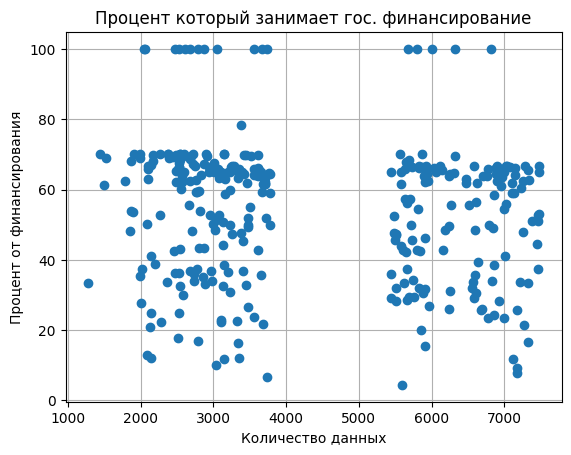

In [54]:
data['share_financing'] = (data['refundable_support'] + data['nonrefundable_support']) / data['budget'] * 100
data['share_financing'] = data['share_financing'].fillna(0.0)
data_share_financing = data[data['share_financing'] > 0]
data_share_financing['share_financing'].plot(grid=True, style='o')
df.title("Процент который занимает гос. финансирование")
df.xlabel("Количество данных")
df.ylabel("Процент от финансирования")
df.show()

В основном гос. финансирование оставляет 60 - 70 процентов от общего бюджета. Что подтверждает вывод ранее.

Были добавленны 4 новых столбца.
1. год выхода фильма
2. ФИО главного режиссёра
3. Основной жанр фильма
4. Процент того сколько занимает гос. финансирование в общем бюджете.

проведен анализ того сколько в основном в бюджете занимает процент гос. финансирования 

Результат чаще всего 60 - 70 процентов.

### Шаг 3. Исследовательский анализ данных


Строим гистограму по количеству выходов фильма каждый год. Фактором выхода фильма в прокат может являться сумма сборов фильма в прокате это колонка 'box_office'. 

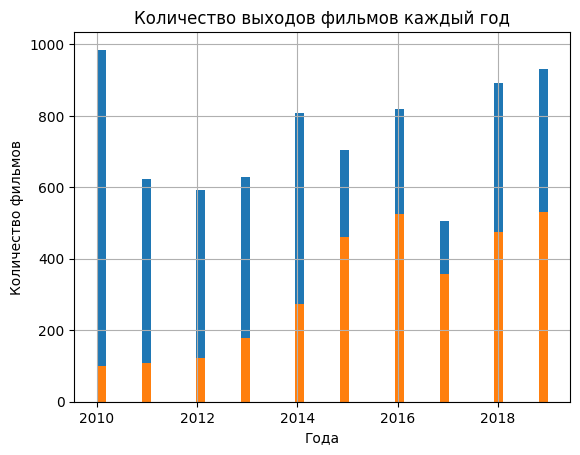

In [55]:
data_year_release = data[data['box_office'] > 0]
data['year_release'].hist(bins = 50)
data_year_release['year_release'].hist(bins = 50)
df.title("Количество выходов фильмов каждый год")
df.xlabel("Года")
df.ylabel("Количество фильмов")
df.show()

Полнее всего по фильмам с указанной информацией о прокате в кинотеатрах предоставлен период с 2014 по 2016 и 2018 - 2019 года.

In [56]:
data_year_release.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3134 entries, 6 to 7480
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  2707 non-null   object             
 1   pu_number              3134 non-null   object             
 2   show_start_date        3134 non-null   datetime64[ns, UTC]
 3   type                   3134 non-null   object             
 4   film_studio            3133 non-null   object             
 5   production_country     3134 non-null   object             
 6   director               3133 non-null   object             
 7   producer               3022 non-null   object             
 8   age_restriction        3134 non-null   object             
 9   refundable_support     3134 non-null   int64              
 10  nonrefundable_support  3134 non-null   int64              
 11  budget                 3134 non-null   float64          

Количество строк в 'data - 7486 

Количество строк в 'data_year_release' - 3134 

Считаем процент

In [57]:
3134 / 7486 * 100

41.86481432006412

Данные о фильмах которые были в прокате в кинотеатрах занимают почти 42 процента от всего датафрейма.

Больше всего фильмов вышло в 2010  и 2018, 2019 годах.
меньгше всего в 2017 году.
Можно предположить что больш всего данных предоставленно в период с 2018 года.

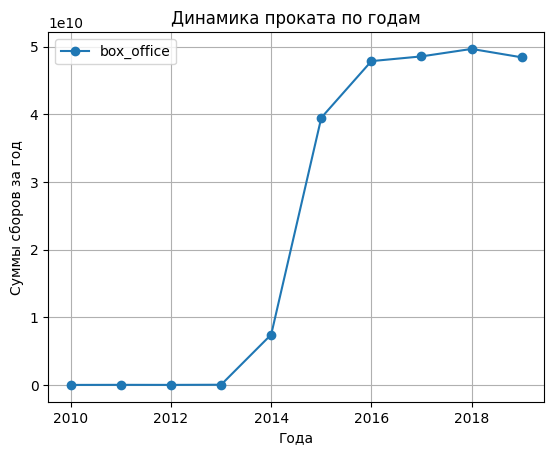

In [58]:
data_year_release = data.pivot_table(index ='year_release', values ='box_office', aggfunc = 'sum')
data_year_release.plot(grid=True,style='o-')
df.title("Динамика проката по годам")
df.xlabel("Года")
df.ylabel("Суммы сборов за год")
df.show()

Из года в год сумма сборов росла. Самые большие сборы были в 2018 году. На сумму сборов могло влиять выход ожидаемых фильмов и инфляция.

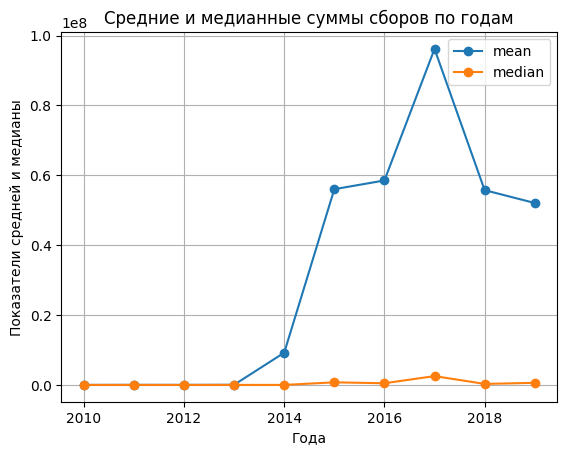

In [59]:
data_median_mean = data.pivot_table(index ='year_release', values ='box_office', aggfunc = ('median', 'mean'))
data_median_mean.plot(grid=True,style='o-')
df.title("Средние и медианные суммы сборов по годам")
df.xlabel("Года")
df.ylabel("Показатели средней и медианы")
df.show()

In [60]:
data_median_mean.mean()

mean     32,783,149.74
median      462,869.45
dtype: float64

Самое большое среднее значение по сборам в 2017 году. 

Саме большое медианное значение по сборам так-же в 2017 году.

Средняя сумма сборов гораздо больше медианной в среднем в 50 раз. Это может быть из-за того что бюджеты фильмов могут сильно отличаться что влияет на среднее значение.

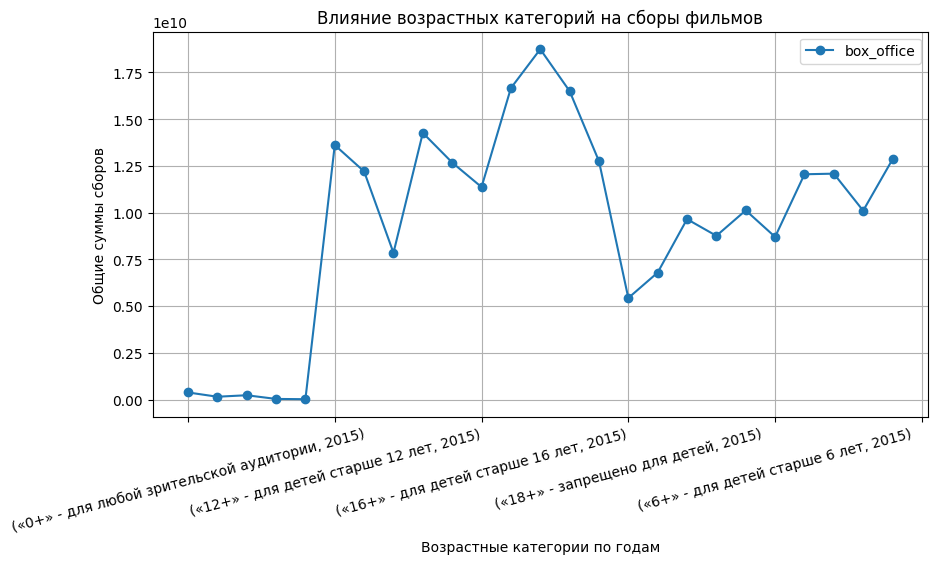

In [61]:
#Строим график.
data_age = data[(data['year_release'] >= 2015) & (data['year_release'] <= 2019)]
data_age = data_age[data_age['box_office'] > 0]
data_age_pivot_table = data_age.pivot_table( index = ('age_restriction', 'year_release'), values = 'box_office', aggfunc = 'sum')
data_age_pivot_table.plot(grid=True, figsize = (10,5), rot=15, fontsize=10,style='o-')
df.title("Влияние возрастных категорий на сборы фильмов")
df.xlabel("Возрастные категории по годам")
df.ylabel("Общие суммы сборов")
df.show()

Рейтинг филь-ма сильно влияет на сборы фильма в прокате. Самые большие сборы были в 2017 году, самый прибыльный рейтинг это 12+

Был проведен исследовательский анализ данных где было выявлено что:
   1. Информация по фильмам которые были в прокате в кинотеатрах занимает всего 40% данных таблицы.
   2. Суммы сборов из года в год растет.
   3. Средняя сумма сборов больше медианной в среднем в 50 раз.
   4. Рейтинг филь-ма сильно влияет на сборы фильма в прокате. Самый прибыльный рейтинг это 12+

### Шаг 4. Исследования фильмов, которые получили государственную поддержку

Создаем переменную с данными таблицы где есть только гос. финансирование.

In [62]:
financing = data[data['share_financing'] > 0]
financing.head()

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_release,main_director,main_genres,share_financing
1281,час призраков,111005313,2013-10-11 12:00:00+00:00,художественный,"ано содействия развитию кинематографии ""ангел-...",россия,а.атанесян,"а.атанесян, м.бабаханов, р.бутко",«16+» - для детей старше 16 лет,0,26500000,"79,411,900.00",Министерство культуры,8.10,"драма,мелодрама",365353,2013,а.атанесян,драма,33.37
1448,стартап.,111003314,2014-03-28 12:00:00+00:00,художественный,"ооо ""компания ""атк-студио""",россия,а.якимчук,а.тютрюмов,«12+» - для детей старше 12 лет,0,26000000,"37,142,857.00",Министерство культуры,6.60,не известно,28140,2014,а.якимчук,не известно,70.00
1498,плюс один.,111004213,2013-09-10 12:00:00+00:00,художественный,"ооо ""компания ""реал-дакота""",россия,"р.давлетьяров, с.комаров","р.давлетьяров, а.котелевский, а.олейников",«12+» - для детей старше 12 лет,0,107847945,"176,023,490.00",Фонд кино,5.30,"комедия,фантастика",19957031,2013,р.давлетьяров,комедия,61.27
1524,dream theatre. live at luna park,111004314,2014-05-05 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,е.миндадзе (псевдоним катя шагалова),л.антонова,«16+» - для детей старше 16 лет,0,28000000,"40,574,140.00",Министерство культуры,4.20,драма,55917,2014,е.миндадзе (псевдоним катя шагалова),драма,69.01
1792,тупой и еще тупее 2,111004414,2014-04-23 12:00:00+00:00,художественный,"ооо ""студия ""пассажир""",россия,м.угаров,"а.миндадзе, л.антонова",«16+» - для детей старше 16 лет,0,25000000,"40,015,122.00",Министерство культуры,6.40,драма,232100,2014,м.угаров,драма,62.48


Осздаем список с самыми частыми оценками фильмов.

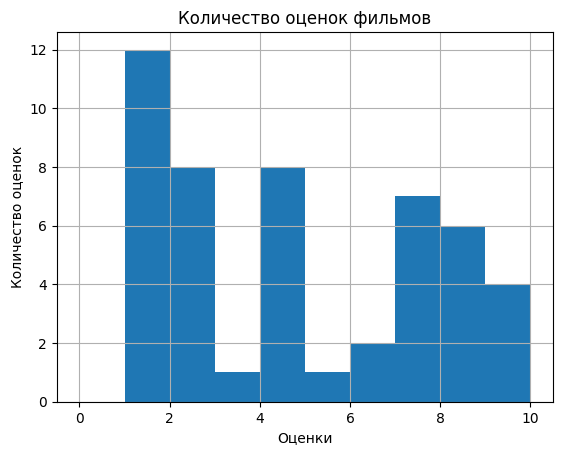

In [63]:
financing['ratings'].value_counts().hist(range =(0,10))
df.title("Количество оценок фильмов")
df.xlabel("Оценки")
df.ylabel("Количество оценок")
df.show()

Чаще всего фильмы с гос финансированием получают оценку в районе 6 балов из 10

Создаем столбец где будет информанция о том окупился фильм или нет.

In [64]:
def budget(row):
    if row['budget'] > row['box_office']:
        return 'собрал меньше бюджета'
    if row['budget'] < row['box_office']:
        return 'собрал больше бюджета'
    if row['budget'] < row['box_office']*2:
        return 'собрал больше бюджета в 2 раза' 
    return 'собрал больше бюджета более чем в 2 раза'

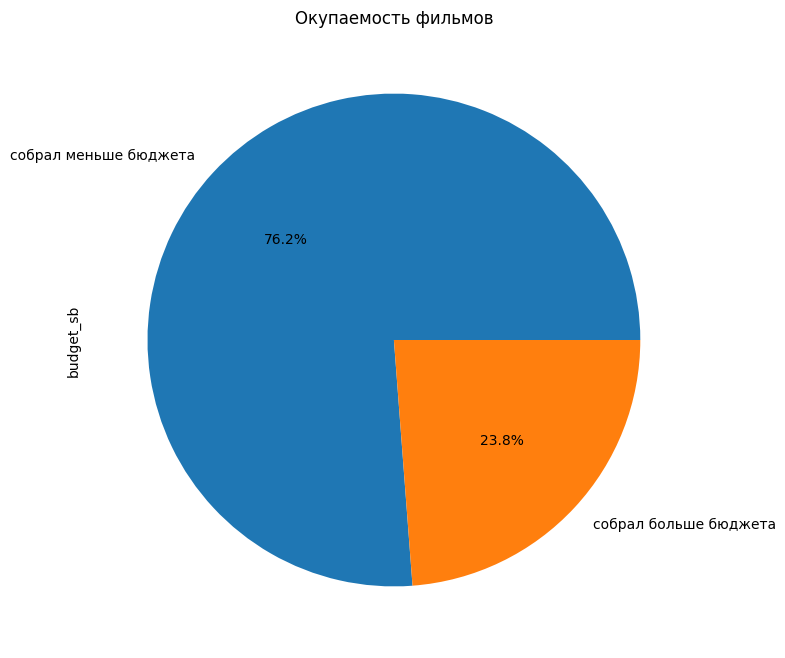

In [65]:
financing['budget_sb'] = financing.apply(budget, axis=1)
financing_budget_sb = financing['budget_sb'].value_counts()
financing_budget_sb.plot(y='budget_sb', kind='pie',figsize=(8,8), autopct='%1.1f%%')
df.title("Окупаемость фильмов")
df.show()

Большая часть фильма собрает в прокате меньше своего бюджета.

Выводим список самых частых жанров.

In [66]:
financingq = financing[financing['main_genres'] != 'не известно']
financingq['main_genres'].value_counts().head()

драма         93
комедия       74
мультфильм    31
мелодрама     15
триллер       15
Name: main_genres, dtype: int64

Больше всего гос. финансирование выделяется на такие жанры как 'Драма' и 'Комедия'

Выводим данные о том какой жанр собирает больше денег в прокате.

In [67]:
fin = financing.pivot_table( index = 'main_genres', values = 'box_office', aggfunc = 'sum')
fin = fin / 1000000
fin.sort_values(by = 'box_office', ascending = False).head()

,box_office
main_genres,
комедия,"12,479.98"
драма,"9,490.84"
мультфильм,"5,622.01"
спорт,"2,967.77"
фантастика,"1,718.20"


Болше всего в прокате собирает жанр 'Комедия', на втором месте с значительным отрывом стоит 'Драма'

Выводим данные на какой вид фильмов финансирование выделятся чаще.

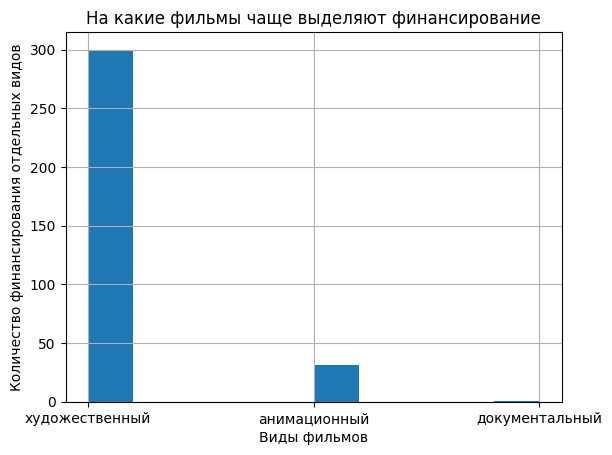

In [68]:
financing['type'].hist()
df.title("На какие фильмы чаще выделяют финансирование")
df.xlabel("Виды фильмов")
df.ylabel("Количество финансирования отдельных видов")
df.show()

Выводим данные о том солько фильмов финансируют из года в год.

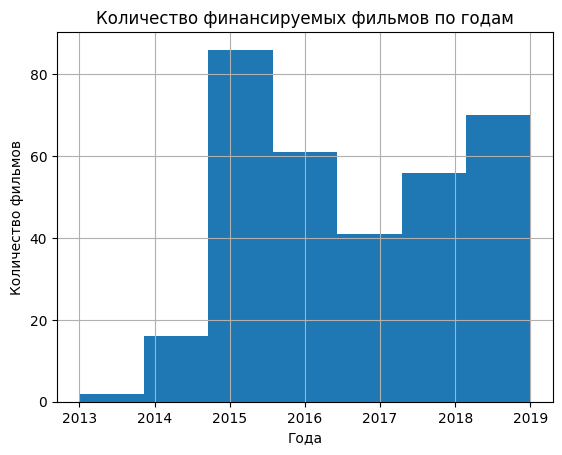

In [69]:
financing['year_release'].hist(bins = 7)
df.title("Количество финансируемых фильмов по годам")
df.xlabel("Года")
df.ylabel("Количество фильмов")
df.show()

После 2014 года виден резкий скачек по количеству фильмов с гос. финансированием, который то немного падает но возрастает.

Смотрим какие организации чаще всего выделяют средства.

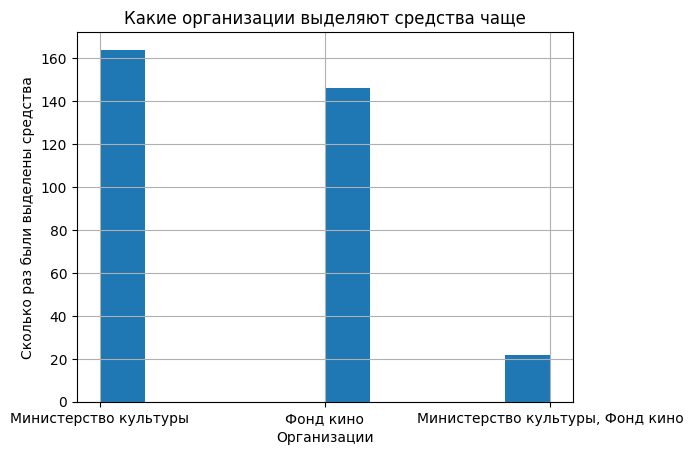

In [70]:
financing['financing_source'].hist()
df.title("Какие организации выделяют средства чаще")
df.xlabel("Организации")
df.ylabel("Сколько раз были выделены средства")
df.show()

Чаще всего средства выделяет 'Министерство культуры', потом идет 'Фонд кино'

Смотрим на какой возрастной рейтин чаще выделяются средства.

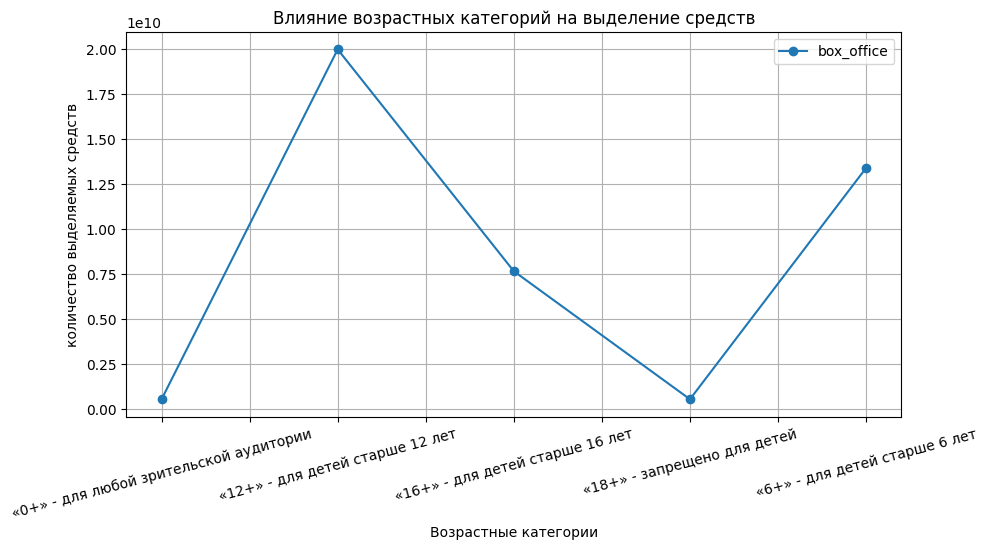

In [71]:
financing_pivot_table = financing.pivot_table( index = ('age_restriction'), values = 'box_office', aggfunc = 'sum')
financing_pivot_table.plot(grid=True, figsize = (10,5), rot=15, fontsize=10,style='o-')
df.title("Влияние возрастных категорий на выделение средств")
df.xlabel("Возрастные категории")
df.ylabel("количество выделяемых средств")
df.show()

Чаще всего средства выделяются на рейтинг '12+'

In [72]:
#Смотрим кто больше выделяет возвратные средства.
financing_pivot_table_2 = financing.pivot_table( index = ('financing_source'), values = 'refundable_support', aggfunc = 'sum')
financing_pivot_table_2.sort_values(by = 'refundable_support', ascending = False)

,refundable_support
financing_source,
Фонд кино,3613500000
"Министерство культуры, Фонд кино",325500000
Министерство культуры,0


Больше всего возвратных средств выделяет 'Фонд кино'. 'Министрество культуры' вообще не выделяет возвратных средств.

In [73]:
#Смотрим кто больше выделяет не возвратные средства.
financing_pivot_table_3 =  financing.pivot_table( index = ('financing_source'), values = 'nonrefundable_support', aggfunc = 'sum')
financing_pivot_table_3.sort_values(by = 'nonrefundable_support', ascending = False)

,nonrefundable_support
financing_source,
Фонд кино,10565095958
Министерство культуры,4836661000
"Министерство культуры, Фонд кино",859931354


Больше всего не возвратных средств выделяет 'Фонд кино'. После идет 'Министрество культуры'.

Исследуя фильмы, которые получили государственную поддержкуБ можно сказать что:
1. Фонд кино не только чаще выделяет средства но и выделяет их куда больше чем министрерство культуры.
2. Чаще всего средства выделяются на проекты с рейтингом 12+ и на такие жанры как драма и комедия.
3. Фильмы с гос. поддержкой мало окупаются и имеют низкие оценки.

### Шаг 5. Общий вывод

Было проведенно исследование данных о  российском кинопрокат сделанны следующие шаги и выводы:
1) Изучение таблицы:
- Были объеденены две таблицы '/datasets/mkrf_movies.csv' и '/datasets/mkrf_shows.csv' в новую таблицу.
- Таблица имеет 7486 строк и 16 столбцов.
- Были обнаруженны столбцы с пропусками.

2) Выполненна переработка данных:
- Замененны пропуски (там где это было возможно).
- Изменены типы данных.

3) Были добмавленны новые стобцы:
 - 'year_release' - год проката.
 - 'main_director' - имя главного режессера.
 - 'main_genres' - основной жанр.
 - 'share_financing' - процент который занимает гос. финансирование от общего бюджета фильма.
 
4) Проведен исследовательский анализ данных:
- Из изученных данных можно сделать вывод что. Среднее значение возвратных средств стоставляет - 370 миллионов. медианное значение возвратных средств составляет - 380 миллионов. Больше всего возратных средств выделяют на сумму 40 - 110 миллионов и 190 - 270 миллионов.
- Среднее значение невозвратных средств стоставляет - 217 миллионов. медианное значение невозвратных средств составляет - 160 миллионов. Больше всего возратных средств выделяют на сумму 100 - 400 тысяч.
- Среднее значение бюджета составляет 490 миллионов. медианное 340 миллионов. самое большое количество общего бюджета находиться в районе от 100 тысяч до 900 тысяч. Можно сказать что студии получившие гос. поддержку на без возратной основе не сильно добавляют своих средст в бюджет фильма.
- В основном гос. финансирование оставляет 60 - 70 процентов от общего бюджета. Что подтверждает вывод ранее.
- Больше всего фильмов вышло в 2010 и 2018, 2019 годах. меньгше всего в 2017 году. Можно предположить что больш всего данных предоставленно в период с 2018 года.
- Изгода в год сумма сборов росла. Самые большие сборы были в 2018 году. На сумму сборов могло влиять выход ожидаемых фильмов и инфляция.
- Самое большое среднее значение по сборам в 2017 году. Саме большое медианное значение по сборам так-же в 2017 году.
- Рейтинг филь-ма сильно влияет на сборы фильма в прокате. Самые большие сборы были в 2017 году, самый прибыльный рейтинг это 12+

5)  иссле́дованы фильмы, которые получили государственную поддержку:
- Чаще всего фильмы с гос финансированием получают оценку в районе 6 балов из 10.
- Большая часть фильма собрает в прокате меньше своего бюджета.
- Болше всего в прокате собирает жанр 'Комедия', на втором месте с значительным отрывом стоит 'Драма'.
- Чаще всего финансирование выделяют на художетвенное кино.
- После 2014 года виден резкий скачек по количеству фильмов с гос. финансированием, который то немного падает но возрастает.
- Чаще всего средства выделяет 'Министерство культуры', потом идет 'Фонд кино'.
- Чаще всего средства выделяются на рейтинг '12+'.
- Больше всего не возвратных средств выделяет 'Фонд кино'. После идет 'Министрество культуры'.
- Больше всего возвратных средств выделяет 'Фонд кино'. 'Министрество культуры' вообще не выделяет возвратных средств.